# Unit 03-01 Logistic Map

## Read

Read Chapter 5, Section 1 of *Computational Modeling and Visualization of Physical Systems* by Jay Wang.

## Introduction

The logistic map is a mathematical model for population growth. The basic model of population growth is 

$$P_{n+1} = aP_n$$

where $a$ is a growth rate, $P_n$ is the population at $t$, $P_{n+1}$ is the population at $t=t+\Delta t$. This model is not very physical because population doesn't generally grow without bounds. An alternative model is

$$P_{n+1} = P_n(a-bP_n)$$

where the non-linear term $-bP_n^2$ depends on death rate, competition for limited resources, etc. It is convenient to rescale the population using $P_{n}=\frac{a}{b}x_n$. Then

$$x_{n+1}=ax_n(1-x_n)$$

Using $a=4r$, we will write it in the form known as the *logistic map*.

$$x_{n+1}=4rx_n(1-x_n)$$

If $x_n \ge 1$, then $x_{n+1}$ is negative which is unphysical because you can't have a negative population. Therefore, $0 \le x_n \le 1$. Also, we will restrict $r$ to the range: $0 \lt r \le 1$. This equation maps a single value of $x_n$ to a single value of $x_{n+1}$. It's called a *1D map*. 

## Explore the Logistic Map Function

Let's plot $x_{n+1}$ for values of $x_n$ from 0 to 1.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

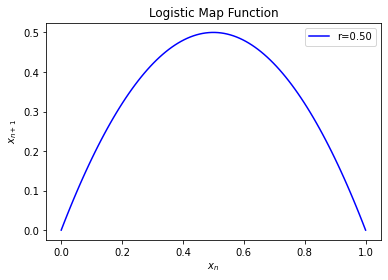

In [8]:
r = 0.5
xn = np.linspace(0,1,100)
xmap = 4*r*xn*(1-xn)

plt.figure()
plt.title("Logistic Map Function")
plt.plot(xn,xmap,"b-", label="r={:.2f}".format(r))
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")
plt.legend(loc="upper right")
plt.show()

### Exercise

Change the value of $r$. How is $r$ related to the map function?

## Explore the Trajectory

The series of values $x_0, x_1, x_2, ...$ is called the *trajectory*. Let's plot the trajectory as a function of iterations $n$. We have to choose an initial value $x_0$ and a constant $r$. Also, let's define a function to return the map function so we don't have to type it every time we need it.

In [3]:
def map_func(xn=0, r=0):
    #input: x_n  value of x at the nth iteration
    #        r   logistic constant
    #output: x_n+1  next value of x
    
    x_npo = 4*r*xn*(1-xn) #map function
    
    return x_npo

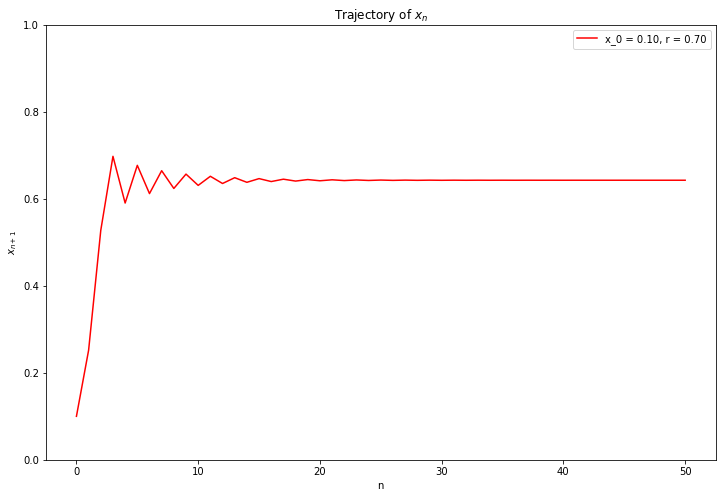

In [6]:
N = 50 #total number of iterations
x_0 = 0.1 #initial value of x
r = 0.7
xn_all = [] #list to store all values of x_n
xn_all.append(x_0) #append initial value
n_all = []
n_all.append(0)

for n in range(N):
    xn = xn_all[n]
    x_nplusone = map_func(xn, r) #calculate x_n+1
    xn_all.append(x_nplusone)
    n_all.append(n+1)

plt.figure(figsize=(12,8))
plt.title("Trajectory of $x_n$")
plt.plot(n_all,xn_all,"r-", label="x_0 = %.2f, r = %.2f" % (x_0, r))
plt.ylim(0,1)
plt.xlabel("n")
plt.ylabel("$x_{n+1}$")
plt.legend(loc="upper right")
plt.show()

## Exercises

Before doing the exercises below, I highly recommend putting the previous program into a function so you can call the function with a different $x_0$, $r$, and $N$ values. It's also helpful to make arguments for the line type of the plot (the string specifying color and line type) and the min and max values on the vertical and horizontal axes. As you do these exercises, you'll want to easily output variations of the model and graph.

### Exercise 1

Explore the dynamical behavior of the logistic map with $r = 0.24$ for different values of $x_0$. Show numerically that $x = 0$ is a stable fixed point for this value of $r$. That is, the iterated values of $x$ converge to $x = 0$ independently of the value of $x_0$. If $x$ represents the population of insects, describe the qualitative behavior of the population.

### Exercise 2

Explore the dynamical behavior of the logistic map for $r$ = 0.26,0.5,0.74, and 0.748. A fixed point is unstable if for almost all values of $x_0$ near the fixed point, the trajectories diverge from it. Verify that $x = 0$ is an unstable fixed point for $r > 0.25$. Show that for the suggested values of r, the iterated values of $x$ do not change after an initial transient; that is, the long time dynamical behavior is period 1.

See Chapter 5 (Wang) to derive that for $r < 3/4$, the trajectories approach the stable attractor at $x^* = 1 − 1/(4r)$. The set of initial points that iterate to the attractor is called the basin of the attractor. For the logistic map, the interval $0 < x < 1$ is the basin of attraction of the attractor $x^* = 1 − 1/(4r)$.

### Exercise 3

Explore the dynamical properties of the logistic map for $r$ = 0.752, 0.76, 0.8, and 0.862. For $r$ = 0.752
and 0.862, approximately 1000 iterations are necessary to obtain convergent results. Show that if $r$ is greater than 0.75, $x$ oscillates between two values after an initial transient behavior. That is, instead of a stable cycle of period 1 corresponding to one fixed point, the system has a stable cycle of period 2. The value of $r$ at which the single fixed point $x^∗$ splits, or *bifurcates*, into two values $x_1^∗$ and $x_2^∗$ is $r=b_1 =3/4$. The pair of $x$ values, $x_1^∗$ and $x_2^∗$, form a *stable attractor* of period 2.

### Exercise 4

What are the stable attractors of the logistic map for $r$ = 0.863 and 0.88? What is the corresponding period? What are the stable attractors and corresponding periods for $r$ = 0.89, 0.891, and 0.8922?

## Fixed Points (Attractors)

The attractors (the value(s) of $x_n$ the trajectory approaches) can be derived algebraically and numerically. See Section 5.1.2 (Wang).

### Period-One Cycle

For a period one cycle with fixed point $x^*$, the value repeats consecutively. Thus, if we write the logistic map as $f(x_n)=4rx_n(1-x_n)$, then

$$x_{n+1}=x_n=x^*$$

$$x^*=f(x^*)$$

$$x^*=4rx^*(1-x^*)$$

The solutions are $x^*=0$ and $x^*=1-1/(4r)$. You should review your findings in Exercise 2 above to verify that indeed these are the solutions.

### Period-Two Cycle

For a period-two cycle,

$$x_{n+2}=x_n=x^*$$

$$x_{n+2}=f(x_{n+1})$$

$$x_{n+2}=f(f(x_{n}))=x_n$$

$$x^*=f(f(x^*))$$

We have to apply the logistic map twice to obtain an equation that can be solved analytically for $x^*$.

## Textbook Exercises

### Exercise 1

Do E5.1 (Wang).

### Exercise 2 (optional)

Do E5.2 (Wang).

## Period Doubling

If you write a program to compute the last 100 (or so) value of $x_{n+1}$ for 1000 iterations (enough for the transient to die out), plot these values as a function of $r$. The resulting plot is called a *bifurcation diagram*. The plot below shows the bifurcation diagram for various values of $r$, effectively zooming in on the graph.

<img src="bifurcation.png" width=650\>

At certain values of $r$, the plot *bifurcates* which results in double the number of fixed points (attractors). For $r<0.75$, the period is one. The bifurcation at $r=0.75$ results in period two. At 0.862, it becomes period four, etc.

## Exercises

### Exercise 1

Write a program to produce the plots shown above.